##Analise de dados: Companhia Milsa:

A companhia Milsa possui dados de 36 funcionários da seção de orçamentos. 

Para cada funcionário temos os seguintes atributos: estado civil, instrução de educação, filhos, salário, idade (anos e meses), região.

Foi solicitado que essas informações fossem organizadas em um dataframe e que uma análise descritivas do dados fosse realizada.

#### Organização dos dados:

In [2]:
#Importando as bibliotecas necessárias para a construção e análise dos dados:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [8]:
#Importando o csv para criação do dataframe:
df_milsa = pd.read_csv('milsa.csv')
df_milsa = df_milsa.set_index('Funcionario')
df_milsa.head()

,Est.civil,Inst,Filhos,Salario,Anos,Meses,Regiao
Funcionario,,,,,,,
1,solteiro,1o Grau,NaN,4.00,26,3,interior
2,casado,1o Grau,1.0,4.56,32,10,capital
3,casado,1o Grau,2.0,5.25,36,5,capital
4,solteiro,2o Grau,NaN,5.73,20,10,outro
5,solteiro,1o Grau,NaN,6.26,40,7,outro


#### Verificando dados nulos:


In [9]:
#Verificando informações nulas nas colunas:
df_milsa[df_milsa['Filhos'].isnull()].head()

,Est.civil,Inst,Filhos,Salario,Anos,Meses,Regiao
Funcionario,,,,,,,
1,solteiro,1o Grau,NaN,4.00,26,3,interior
4,solteiro,2o Grau,NaN,5.73,20,10,outro
5,solteiro,1o Grau,NaN,6.26,40,7,outro
7,solteiro,1o Grau,NaN,6.86,41,0,interior
8,solteiro,1o Grau,NaN,7.39,43,4,capital


Com o levantamento das informações nulas, verificamos que na base de dados analisada todos os funcionários solteiros tinham a informação de filhos nula. Dessa forma, escolhemos realizar a análise compreendendo essa informação de forma que os funcionários solteiros não tinham filhos, substituindo os valores nulos por zero.

- Substituido dados nulos por 0:

In [10]:
#Substituindo os valores NaN po 0:
df_milsa['Filhos'] = df_milsa['Filhos'].replace(np.nan, 0)
df_milsa.head()

,Est.civil,Inst,Filhos,Salario,Anos,Meses,Regiao
Funcionario,,,,,,,
1,solteiro,1o Grau,0.0,4.00,26,3,interior
2,casado,1o Grau,1.0,4.56,32,10,capital
3,casado,1o Grau,2.0,5.25,36,5,capital
4,solteiro,2o Grau,0.0,5.73,20,10,outro
5,solteiro,1o Grau,0.0,6.26,40,7,outro


#### Quantidade de funcionários por estado civil:

In [48]:
#Contabilizando a quantidade de funcionários por estado civil:
est_civil = df_milsa.loc(axis = 1)[['Est.civil']].value_counts()
est_civil

Est.civil
casado       20
solteiro     16
dtype: int64

- Gráfico da quantidade de funcionários por estado civil:

Text(0.5, 0, 'Funcionários (qnt)')

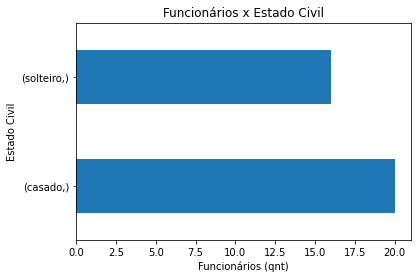

In [11]:
#Gráfico da quantidade de funcionários por estado civil:
grafico_est_civil = df_milsa.loc(axis = 1)[['Est.civil']].value_counts().plot(kind="barh")
grafico_est_civil.set_title('Funcionários x Estado Civil')
grafico_est_civil.set_ylabel('Estado Civil')
grafico_est_civil.set_xlabel('Funcionários (qnt)')

Verificamos que a maior parte dos funcinários possui estado civil: casado.

#### Quantidade de funcionários por Instrução de Educação:

In [50]:
#Contabilizando da quantidade de funcionários por instrução de educação:
inst_educacao = df_milsa.loc(axis = 1)[['Inst']].value_counts()
inst_educacao

Inst    
2o Grau     18
1o Grau     12
Superior     6
dtype: int64

- Gráfico da quantidade de funcionários por Instrução de Educação:

Text(0.5, 0, 'Funcionários (qnt)')

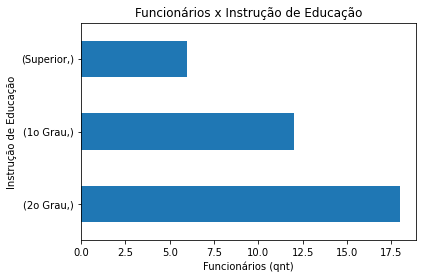

In [12]:
#Gráfico da quantidade de funcionários por instrução de educação:
grafico_inst_educacao = df_milsa.loc(axis = 1)[['Inst']].value_counts().plot(kind="barh")
grafico_inst_educacao.set_title('Funcionários x Instrução de Educação')
grafico_inst_educacao.set_ylabel('Instrução de Educação')
grafico_inst_educacao.set_xlabel('Funcionários (qnt)')

Verificamos que a maior parte dos funcionários possui instrução escolar: 2º grau.

#### Sabendo que a coluna meses não é necessária para a análise e deve ser retirada, qual a média de idade dos funcionários?:

In [13]:
#Removendo a coluna 'Meses':
del df_milsa['Meses']
df_milsa.head()

,Est.civil,Inst,Filhos,Salario,Anos,Regiao
Funcionario,,,,,,
1,solteiro,1o Grau,0.0,4.00,26,interior
2,casado,1o Grau,1.0,4.56,32,capital
3,casado,1o Grau,2.0,5.25,36,capital
4,solteiro,2o Grau,0.0,5.73,20,outro
5,solteiro,1o Grau,0.0,6.26,40,outro


In [53]:
#Calculando a média de idade dos funcionários:
df_milsa['Anos'].mean()

34.583333333333336

#### Dos funcionários que têm filhos, qual o número mais comum?:

In [54]:
#Achando a moda (número mais repetido) da quantidade de funcionários com filhos:
df_milsa['Filhos'].mode()

0    2.0
dtype: float64

- Qual a média e a mediana dos salários dos funcionários? O que esses valores podem indicar?:

Verificamos que a média e mediana são valores bem próximos, dessa formas ambos podem ser usados como valores de tendência central.

In [55]:
#Média do salário do funcinários:
df_milsa['Salario'].mean()

11.122222222222222

In [56]:
#Mediana do salário do funcinários:
df_milsa['Salario'].median()

10.165

#### Quais são os tipos de instrução existentes?:

In [67]:
#Verificando informações da coluna 'Inst':
df_milsa['Inst'].unique()

array(['1o Grau', '2o Grau', 'Superior'], dtype=object)

#### Qual a média de salário e idade das pessoas casadas?:

In [73]:
#Calculando a média do salário e da idade dos funcionários casados:
est_civil = df_milsa.loc[(df_milsa['Est.civil'] == 'casado')].mean()
est_civil.drop(['Filhos'], inplace = True)
est_civil

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Salario    12.1235
Anos       35.1500
dtype: float64

#### Qual o funcionário que possui maior salário (informe seus atributos): 

In [60]:
#Funcionário com o maior salário:
df_milsa.query('Salario == Salario.max()')

,Est.civil,Inst,Filhos,Salario,Anos,Regiao
Funcionario,,,,,,
36,casado,Superior,3.0,23.3,42,interior


#### Qual o funcionário que possui menor idade (informe seus atributos):

In [61]:
#Funcionário com a menor idade:
df_milsa.query('Anos == Anos.min()')

,Est.civil,Inst,Filhos,Salario,Anos,Regiao
Funcionario,,,,,,
4,solteiro,2o Grau,NaN,5.73,20,outro


#### Quem são os funcionários que possuem no máximo 35 anos, são da capital e tem instrução de 2o grau?:

In [14]:
#Funcionário com até 35 anos, morador da região capital e instrução de educação de segundo grau:
df_milsa.query('Anos <= 35 and Regiao == "capital" and Inst == "2o grau"')

,Est.civil,Inst,Filhos,Salario,Anos,Regiao
Funcionario,,,,,,


#### Faça uma correlação entre todos os atributos. (Dica: mapeie os atributos qualitativos para atributos quantitativos. Ex: solteiro: 1, casado: 2, etc):

In [80]:
#Transformando os atributos qualitativos em atributos quantitativos para verificar correlação:
df_milsa['Inst'] = df_milsa['Inst'].replace(['1o Grau', '2o Grau', 'Superior'], [1,2,3])
df_milsa['Regiao'] = df_milsa['Regiao'].replace(['interior', 'capital', 'outro'], [1,2,3])
df_milsa['Est.civil'] = df_milsa['Est.civil'].replace(['solteiro', 'casado'], [1,2])

In [95]:
#Criando tabela de correlação:
correlacao = df_milsa.corr()
correlacao

,Est.civil,Inst,Filhos,Salario,Anos,Regiao
Est.civil,1.000000,0.108465,0.664838,0.247488,0.095369,-0.238647
Inst,0.108465,1.000000,0.114723,0.639350,-0.216011,-0.088979
Filhos,0.664838,0.114723,1.000000,0.375551,0.422981,-0.160013
Salario,0.247488,0.639350,0.375551,1.000000,0.363362,-0.102727
Anos,0.095369,-0.216011,0.422981,0.363362,1.000000,0.082419
Regiao,-0.238647,-0.088979,-0.160013,-0.102727,0.082419,1.000000


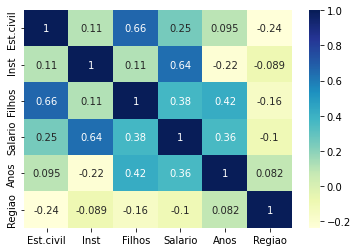

In [96]:
#Criando gráfico de correlação:
sns.heatmap(correlacao, xticklabels=correlacao.columns, yticklabels=correlacao.columns, annot=True, cmap="YlGnBu")

Olhando para o gráfico de correlação vemos que os atributos Anos e Salario possui uma correlação de 0.3. Ou seja, em nossa base de dados, os funcionários mais velhos ganham um salário maior. Outra informação importante é que quanto maior a instrução escolar, maior o salário, uma vez que a correlação desses atributos é de 0.6, sendo a maior correlação da base.

#### Forneça pelo menos mais 3 informações que você achar interessante (Você pode se basear nessa análise exploratória de dados feita em R:

In [ ]:
#Média do salário por estado civil:
analise_salario_est_civil = df_milsa.loc(axis=1)[['Est.civil', 'Salario']].groupby('Est.civil').mean('Salario')
analise_salario_est_civil.sort_values(by='Salario', ascending=False, inplace=True) 
analise_salario_est_civil 

,Salario
Est.civil,
casado,12.123500
solteiro,9.870625


Text(0.5, 0, 'Média Salário (mil)')

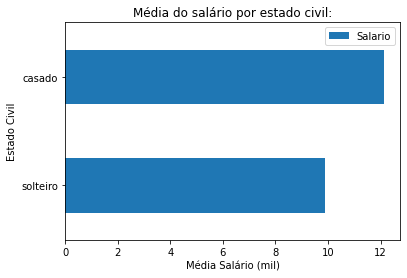

In [ ]:
#Gráfico da média do salário por estado civil:
grafico_analise_salario_est_civil = analise_salario_est_civil.sort_values(by='Salario', ascending=True).plot(kind="barh")
grafico_analise_salario_est_civil.plot(kind="barh")
grafico_analise_salario_est_civil.set_title('Média do salário por estado civil:')
grafico_analise_salario_est_civil.set_ylabel('Estado Civil')
grafico_analise_salario_est_civil.set_xlabel('Média Salário (mil)')

Aqui vemos que os funcinário com estado civil: casado recebem um salário maior que os funcionário com estado civil: solteiro.

In [ ]:
#Média do salário por instrução de educação:
analise_salario_est_edu = df_milsa.loc(axis=1)[['Inst', 'Salario']].groupby('Inst').mean('Salario')
analise_salario_est_edu.sort_values(by='Salario', ascending=False, inplace=True) 
analise_salario_est_edu 

,Salario
Inst,
Superior,16.475000
2o Grau,11.528333
1o Grau,7.836667


Text(0.5, 0, 'Média Salário (mil)')

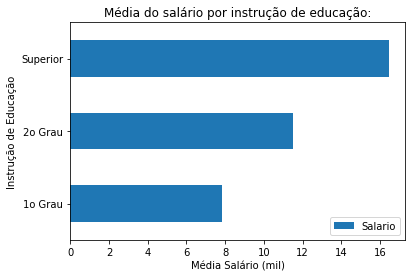

In [ ]:
#Gráfico da média do salário por instrução de educação:
grafico_analise_salario_est_edu = analise_salario_est_edu.sort_values(by='Salario', ascending=True).plot(kind="barh")
grafico_analise_salario_est_edu.plot(kind="barh")
grafico_analise_salario_est_edu.set_title('Média do salário por instrução de educação:')
grafico_analise_salario_est_edu.set_ylabel('Instrução de Educação')
grafico_analise_salario_est_edu.set_xlabel('Média Salário (mil)')

Verificamos também que quanto maior o grau de instrução do funcionário, maior o seu salário.

In [ ]:
#Média do salário por região:
analise_salario_regiao = df_milsa.loc(axis=1)[['Regiao', 'Salario']].groupby('Regiao').mean('Salario')
analise_salario_regiao.sort_values(by='Salario', ascending=False, inplace=True) 
analise_salario_regiao 

,Salario
Regiao,
interior,11.550000
capital,11.455455
outro,10.445385


Text(0.5, 0, 'Média Salário (mil)')

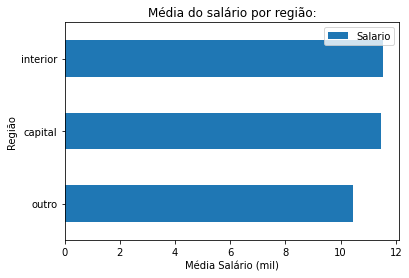

In [ ]:
#Gráfico da média do salário por região:
grafico_analise_regiao = analise_salario_regiao.sort_values(by='Salario', ascending=True).plot(kind="barh")
grafico_analise_regiao.plot(kind="barh")
grafico_analise_regiao.set_title('Média do salário por região:')
grafico_analise_regiao.set_ylabel('Região')
grafico_analise_regiao.set_xlabel('Média Salário (mil)')

Verificamos aqui que os funcionários que residem na região: interior possui um salário maior em comparação as outras regiões.